# Differential (gene) Expression

This notebook can be used to find genes which are differentially expressed in two phenotypes. 

A note on some of the parameters we are using:

- **gene expression**: We use a compilation of 40 RNASeq samples taken from TCGA, 20 of those are Breast Cancer primary tumors (BRCA) and 20 are matched normal tissue. Here is the GCT file which contains those HTSeq counts:  
https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_filtered.gct  

- **phenotype file**: We will use this CLS file to identify the samples' phenotype   
https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_labels.cls

In [1]:
import genepattern
import ccalnoir as ccal

from ccalnoir import differential_gene_expression
import pandas as pd
import urllib.request
from ccalnoir import compute_information_coefficient
from ccalnoir import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(differential_gene_expression, name="Differential gene expression, discrete pheotype.", 
                        description="Sort genes according to their association with a discrete phenotype or class vector.",
                        parameters={
                                "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'Pearson Correlation Matching':"custom_pearson_corr",
                                                                 'Information Correlation Matching':"compute_information_coefficient",
                                                                }
                                                     }
                        })

GPUIBuilder(description='Sort genes according to their association with a discrete phenotype or class vector.', function_import='differential_gene_expression', name='Differential gene expression, discrete pheotype.', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'phenotype_file', 'label': 'phenotype_file', 'optional': False, 'default': '', 'description': 'CLS filename; input binary phenotype/class distinction', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': False, 'default': '', 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': False, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Pearson Correlation Matching': 'custom_pearson_corr', 'Information Correlation Matching': 'compute_information_coefficient'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': 'None', 'description': 'The title of the heatmap', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7fa52189e378> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.
-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------


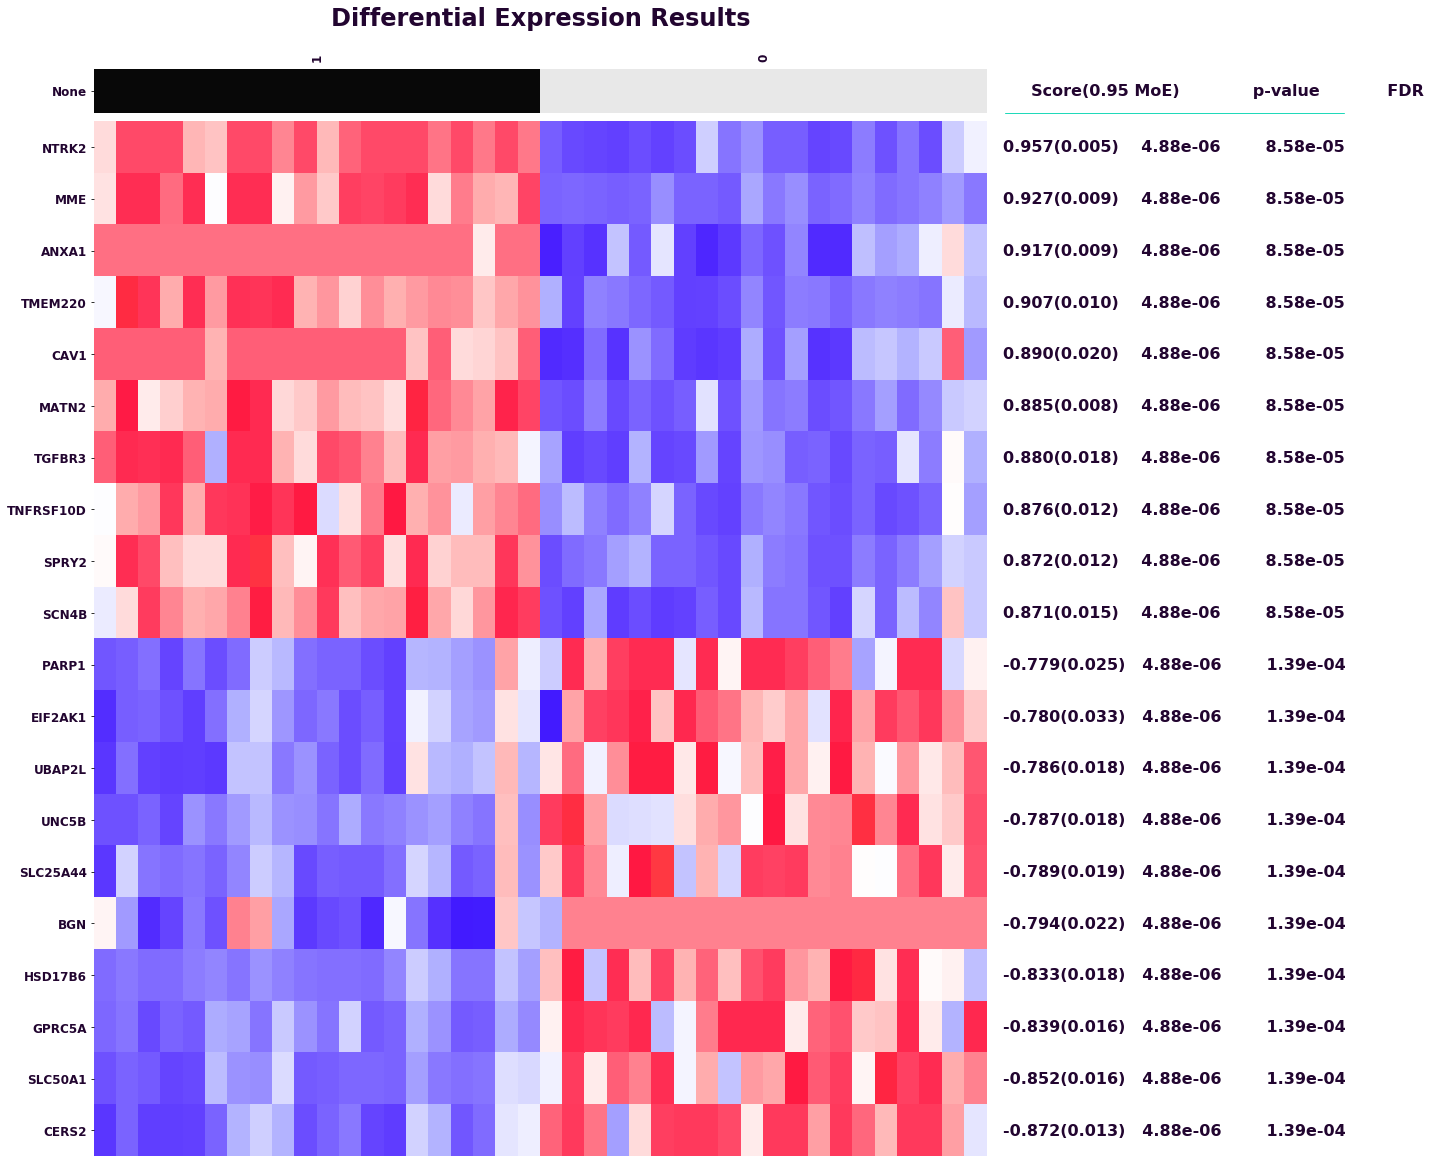

In [2]:
de_results = differential_gene_expression(gene_expression="https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_filtered.gct", phenotype_file="https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_labels.cls", output_filename="None", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="Differential Expression Results", random_seed=20121020)